In [1]:
import numpy as np

In [76]:
class SimpleNN():
    def __init__(self, nb_features, neurons):
        # nb_features: input shape
        # neurons: define the neurons of each FC layer
        self.nb_features, self.neurons = nb_features, neurons
        self.weights = {}
        self.biases = {}
        self.activations = {}
        self.errs = []
        
        for i, neuron in enumerate(neurons):
            if i == 0:
                self.weights[i+1] = np.random.normal(scale=0.5, size=(neurons[i], nb_features))
            else:
                self.weights[i+1] = np.random.normal(scale=0.5, size=(neurons[i], neurons[i-1]))
            self.biases[i+1] = np.zeros((neurons[i], 1))  

    def sigmoid(self, x, derivative=False):
        # you already input the sigmoid function, so use x rather than sigmoid(x)
        if derivative: 
            return x * (1-x)
        return np.exp(-np.logaddexp(0, -x))
        return 1 / (np.exp(-x))
        
            
    def fit(self, x, Y, batch_size, epochs, shuffle=True, learning_rate=0.05, decreasing_rate=0):
        chunk = epochs // 100
        
        for e in range(1, epochs+1):
            self.update(x, Y, batch_size, epochs, shuffle, learning_rate)
            if chunk < 1 or e % chunk == 0:
                print("epoch {}:".format(e))
            learning_rate *= (1-decreasing_rate)
        for i in range(Y.shape[0]):
            _, activations, err = self.feedforward(x[i], Y[i])
            print(x[i], Y[i], activations[len(self.weights)], err)
        self.activations = activations
        
    def update(self, x, Y, batch_size, epochs, shuffle, learning_rate):
        weight_adjustments = {}
        bias_adjustments = {}
        # no vectorization 
        order = list(range(len(x)))
        if shuffle:
            np.random.shuffle(order)
        errs = 0
        for i in range(0, Y.shape[0], batch_size):
            for j in range(i, i+batch_size):
                zs, activations, err = self.feedforward(x[order][j], Y[order][j])
                errs += err
                weight_gradients, bias_gradients = self.backpropagation(Y[order][j], zs, activations)
                for key in weight_gradients.keys():
                    weight_adjustments[key] = weight_adjustments.get(key, np.zeros(weight_gradients[key].shape)) + weight_gradients[key]
                    bias_adjustments[key] = bias_adjustments.get(key, np.zeros(bias_gradients[key].shape)) + bias_gradients[key]

            for j in range(1, len(self.weights)+1):
                self.weights[j] -= learning_rate * weight_adjustments[j] / Y.shape[0]
                self.biases[j] -= learning_rate * bias_adjustments[j] / Y.shape[0]
        self.errs.append(errs)
        
    def feedforward(self, x, Y):
        #print(x, Y)
        a = x.reshape((self.nb_features, 1))
        activations = {0: a}
        zs = {}
        for i in range(1, len(self.weights)+1):
            z = np.dot(self.weights[i], a) + self.biases[i]
            a = self.sigmoid(z)
            zs[i] = z
            activations[i] = a
        
        err = np.sum(0.5 * (Y - activations[len(self.weights)])**2)
        return zs, activations, err
    
    def backpropagation(self, Y, zs, activations):
        weight_gradients, bias_gradients = {}, {}
        delta = activations[len(self.weights)] - Y

        weight_gradients[len(self.weights)] = (delta * activations[len(self.weights)-1]).T
        bias_gradients[len(self.weights)] = delta
        for i in range(len(self.weights)-1, 0, -1):
            delta = np.dot(self.weights[i+1].T, delta) * self.sigmoid(activations[i], derivative=True)
            weight_gradients[i] = np.dot(delta, activations[i-1].T)
            bias_gradients[i] = delta
        return weight_gradients, bias_gradients

In [77]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
Y = np.array([0,1,1,0])
NN = SimpleNN(X.shape[1], [5, 5, 1])

In [78]:
NN.fit(X, Y, batch_size=1, epochs=90000, shuffle=True, learning_rate=0.05, decreasing_rate=1e-4)

epoch 900:
epoch 1800:
epoch 2700:
epoch 3600:
epoch 4500:
epoch 5400:
epoch 6300:
epoch 7200:
epoch 8100:
epoch 9000:
epoch 9900:
epoch 10800:
epoch 11700:
epoch 12600:
epoch 13500:
epoch 14400:
epoch 15300:
epoch 16200:
epoch 17100:
epoch 18000:
epoch 18900:
epoch 19800:
epoch 20700:
epoch 21600:
epoch 22500:
epoch 23400:
epoch 24300:
epoch 25200:
epoch 26100:
epoch 27000:
epoch 27900:
epoch 28800:
epoch 29700:
epoch 30600:
epoch 31500:
epoch 32400:
epoch 33300:
epoch 34200:
epoch 35100:
epoch 36000:
epoch 36900:
epoch 37800:
epoch 38700:
epoch 39600:
epoch 40500:
epoch 41400:
epoch 42300:
epoch 43200:
epoch 44100:
epoch 45000:
epoch 45900:
epoch 46800:
epoch 47700:
epoch 48600:
epoch 49500:
epoch 50400:
epoch 51300:
epoch 52200:
epoch 53100:
epoch 54000:
epoch 54900:
epoch 55800:
epoch 56700:
epoch 57600:
epoch 58500:
epoch 59400:
epoch 60300:
epoch 61200:
epoch 62100:
epoch 63000:
epoch 63900:
epoch 64800:
epoch 65700:
epoch 66600:
epoch 67500:
epoch 68400:
epoch 69300:
epoch 70200

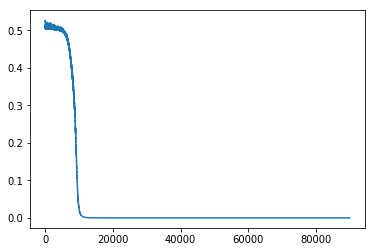

In [80]:
import matplotlib.pyplot as plt
plt.plot(range(len(NN.errs)), NN.errs)
plt.savefig(fname="result.png")
plt.show()
plt.close()